# Prosper loans dataset Investigation

## Investigation Overview

In this investigation I wanted to figure out two things:
<ul>
    <li>The factors which can be used to predict default on credit.</li>
    <li>What factors influence Prosper rating.</li>
</ul>

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: <b>Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors</b>. After adjusting and wrangling dataset contained 26005 data points.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# setting default color
default_color = sb.color_palette('muted')[4]
# getting rid of scientific notation
pd.options.display.float_format = '{:.2f}'.format

## Wrangling
There were three major issues with data:
<ol>
    <li>Need to  remove pre 2009 data points entirely</li>
    <li>Stated monthly income had an unusually high number of outliers. You will need to drop all the data above three standard deviations from the mean.</li>
</ol>

In [4]:
# droping pre-2009 data
target_df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [5]:
target_df['StatedMonthlyIncome'].describe()

count     84853.00
mean       5931.17
std        8239.94
min           0.00
25%        3434.00
50%        5000.00
75%        7083.33
max     1750002.92
Name: StatedMonthlyIncome, dtype: float64

In [6]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
boundary

30651.00602334653

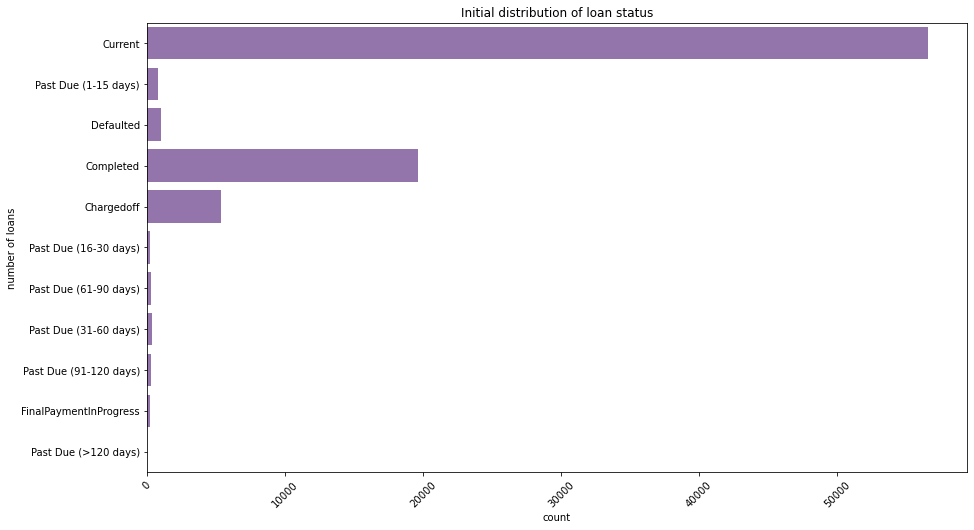

In [7]:
plt.figure(figsize=[14.70, 8.27])
plt.xticks(rotation=45)
plt.title('Initial distribution of loan status')
sb.countplot(data = target_df, y = 'LoanStatus', color = default_color,orient="h")
plt.ylabel('number of loans');

In [8]:
# leaving only completed chargedoff or defaulted listings
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') | (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

target_df


,index,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
12,15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.36,0.32,...,-9.81,0.00,3790.25,3790.25,0.00,1.00,0,0,0.00,10
18,23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073000000,NaN,36,Defaulted,2013-12-26 00:00:00,0.28,0.24,...,-4.89,0.00,1882.27,1882.27,0.00,1.00,0,0,0.00,30
21,26,0F4F3571508214190FD75CB,713131,2013-02-12 18:07:31.690000000,NaN,60,Completed,2013-10-22 00:00:00,0.31,0.28,...,-25.81,0.00,0.00,0.00,0.00,1.00,0,0,0.00,37
22,27,0F5034867864161084F3789,463083,2010-06-16 16:23:44.533000000,NaN,36,Completed,2013-07-03 00:00:00,0.11,0.09,...,-64.62,0.00,0.00,0.00,0.00,1.00,0,0,0.00,121
25,30,0F57353904771934596FE9F,555213,2012-01-30 17:59:17.200000000,NaN,36,Completed,2012-12-19 00:00:00,0.13,0.10,...,-68.22,0.00,0.00,0.00,0.00,1.00,0,0,0.00,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84832,113908,C9843500054876019D611A1,486057,2010-11-29 10:40:09.730000000,NaN,36,Completed,2011-01-31 00:00:00,0.36,0.32,...,-11.02,0.00,0.00,0.00,0.00,1.00,0,0,0.00,98
84837,113913,D2013482695428940FAD9E3,455673,2010-04-25 15:13:27.963000000,NaN,36,Completed,2013-05-05 00:00:00,0.12,0.10,...,-129.82,0.00,0.00,0.00,0.00,1.00,0,0,0.00,265
84844,113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,NaN,36,Completed,2011-09-19 00:00:00,0.22,0.19,...,-4.41,0.00,0.00,0.00,0.00,1.00,0,0,0.00,25
84845,113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,NaN,36,Completed,2014-02-07 00:00:00,0.30,0.26,...,-6.54,0.00,0.00,0.00,0.00,1.00,0,0,0.00,26


After wrangling there are 26005 loans in data set.

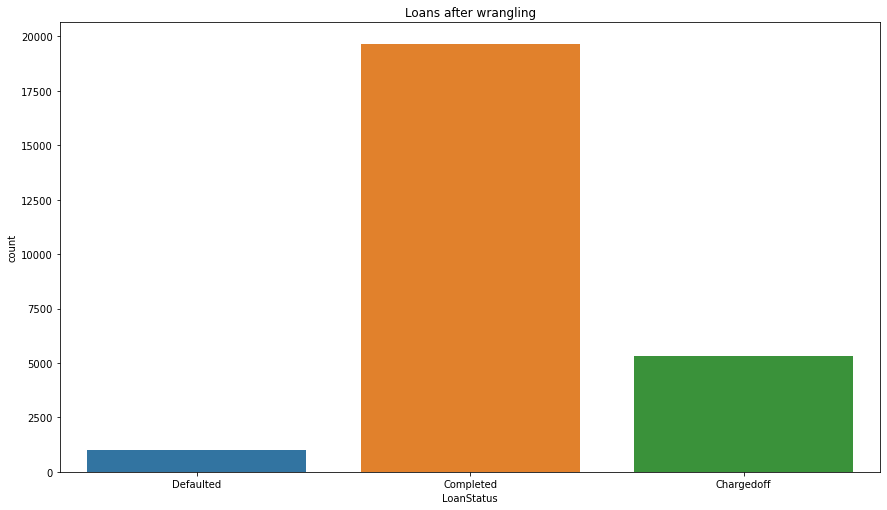

In [9]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Loans after wrangling')
sb.countplot(data = target_df, x = 'LoanStatus');

In [10]:
# Removing outliers from income column
target_df = target_df[target_df['StatedMonthlyIncome'] < boundary]

In [11]:
target_df['StatedMonthlyIncome'].describe()

count   25938.00
mean     5328.39
std      3390.76
min         0.00
25%      3166.67
50%      4583.33
75%      6666.67
max     30416.67
Name: StatedMonthlyIncome, dtype: float64

After wrangling Distribution of Monthly income looks approximately normal with high right skew and a mean of 5328 USD. The minimum and maximum value of 0.00 and 30416.67 USD

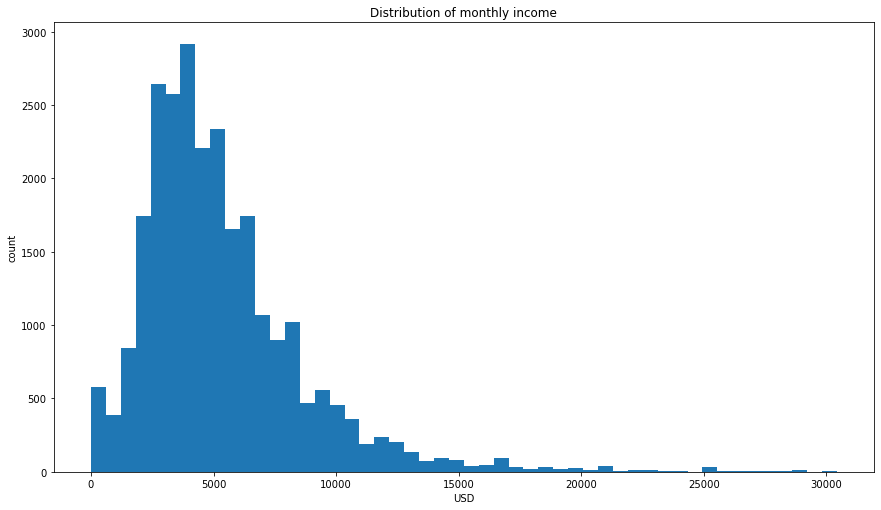

In [12]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Distribution of monthly income')
plt.ylabel('count')
plt.xlabel('USD')
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=50);

In [13]:
# order of ratings
ratings_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
# created ordered categorical variable
target_df['ProsperRating (Alpha)'] = pd.Categorical(target_df['ProsperRating (Alpha)'],
                                                   categories = ratings_order,
                                                   ordered = True)

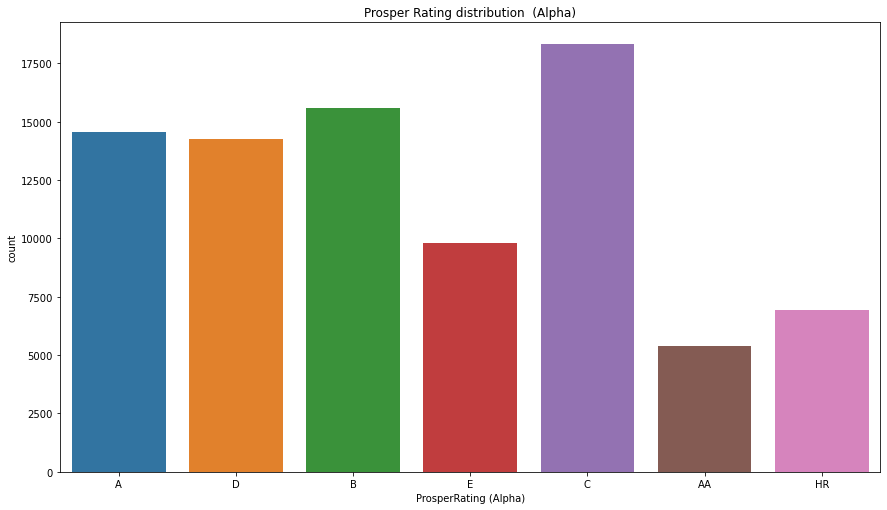

In [14]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=df, x='ProsperRating (Alpha)')
plt.title('Prosper Rating distribution  (Alpha)');

ProsperRating is an ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR'), ratings have almost normal distribution in data set centered at 'C' the highest 'AA' and the lowest 'HR' ratings have the least occurrences. 

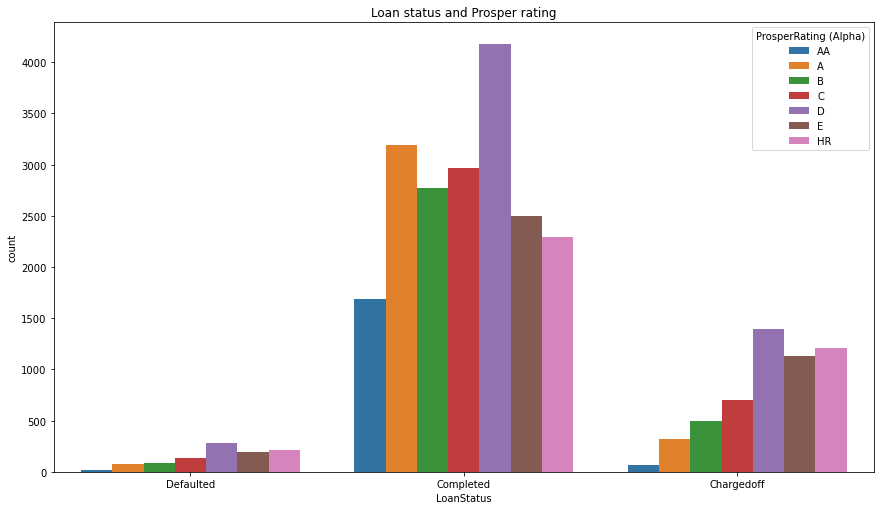

In [15]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Loan status and Prosper rating')
sb.countplot(data=target_df, x='LoanStatus', hue='ProsperRating (Alpha)');

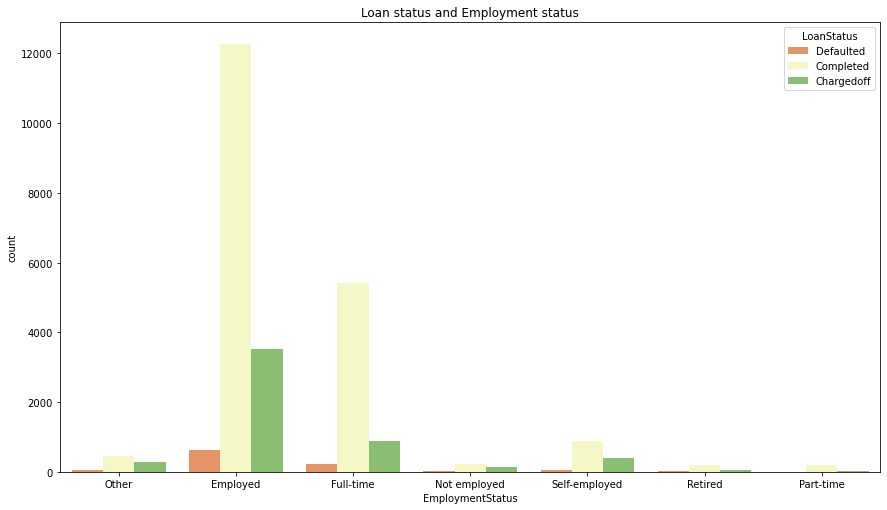

In [16]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Loan status and Employment status')
sb.countplot(data=target_df, x='EmploymentStatus', hue='LoanStatus',palette="RdYlGn");

Individuals with employment status 'employed' are more likely to have the maximum credit and completed one. while, others not. as noticed part time do not have any deafult loan and retired are the minimum

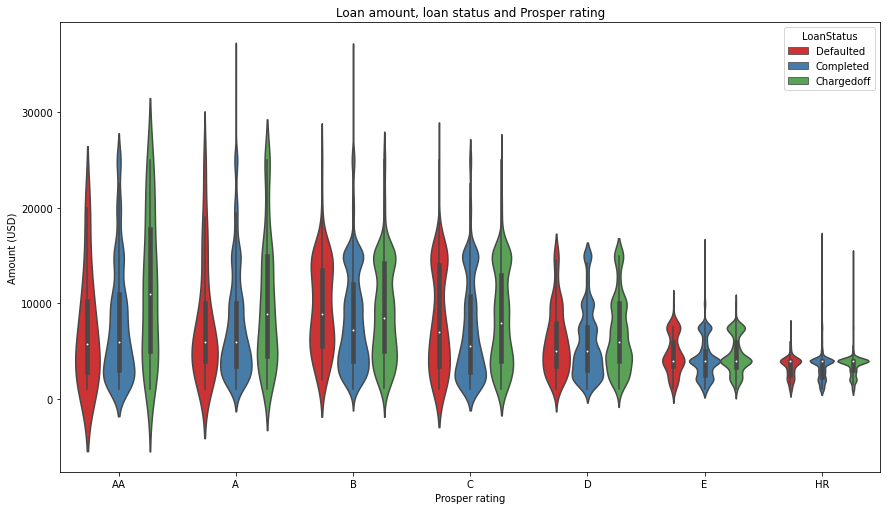

In [17]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Loan amount, loan status and Prosper rating')
sb.violinplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set1")
plt.xlabel('Prosper rating')
plt.ylabel('Amount (USD)');

AAA prosper rating has the maximum borrowed amount in all three loan staus. Then comes HR as the lowest one 

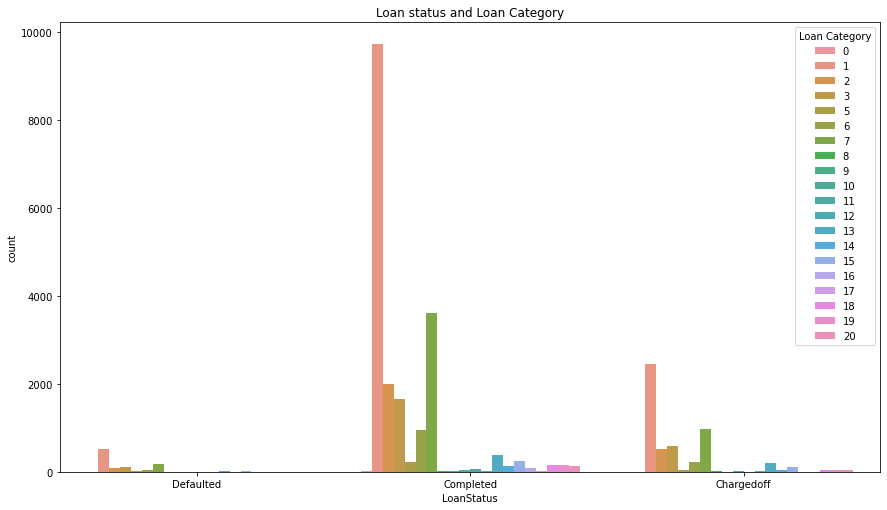

In [18]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Loan status and Loan Category')
g = sb.countplot(data=target_df, x='LoanStatus', hue='ListingCategory (numeric)')
g.legend_.set_title('Loan Category');

Loan category zero proved to be riskier than others. It needs more deep overview

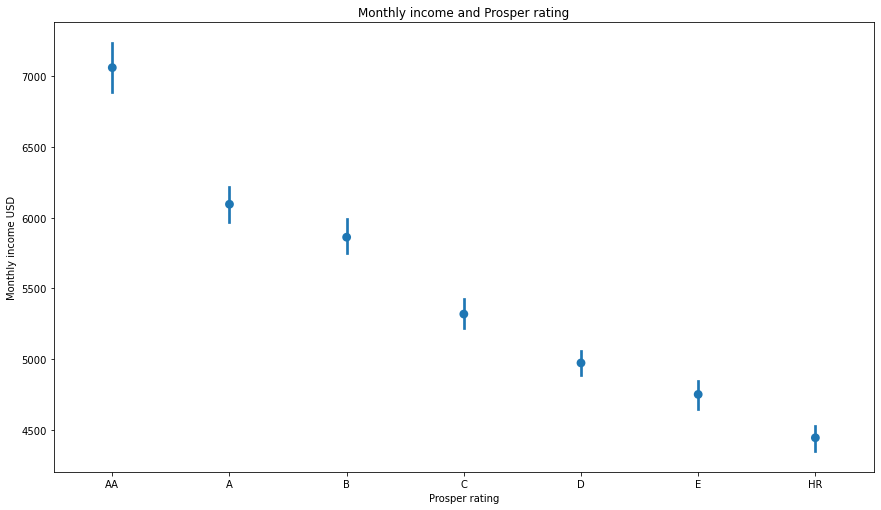

In [19]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Monthly income and Prosper rating')
sb.pointplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', linestyles = '')
plt.xlabel('Prosper rating')
plt.ylabel('Monthly income USD');

Individuals with high rating tend to have higher monthly income.

In [ ]:
!jupyter nbconvert slides_deck.ipynb --to slides --post serve  --no-input --no-prompt